In [1]:
# Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_df = pd.read_csv('Resources/lending_data.csv')

# Review the DataFrame
lending_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = lending_df['loan_status']

# Separate the X variable, the features
X = lending_df.iloc[:, :7]

In [4]:
# Review the y variable Series
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [6]:
# Check the balance of our target values
y.value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [7]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [8]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(random_state=1)

# Fit the model using training data
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [9]:
# Make a prediction using the testing data
predictions = model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [10]:
# Print the balanced_accuracy score of the model
balanced_accuracy = balanced_accuracy_score(y_test, predictions)
balanced_accuracy

0.9521352751368186

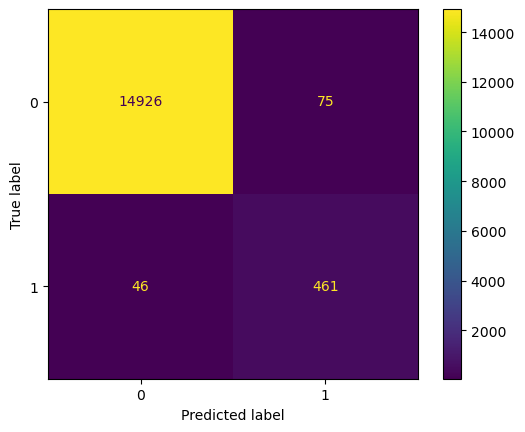

In [11]:
# Generate a confusion matrix for the model
cmatrix = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cmatrix)
disp.plot()
plt.show()

In [12]:
# Print the classification report for the model
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15001
           1       0.86      0.91      0.88       507

    accuracy                           0.99     15508
   macro avg       0.93      0.95      0.94     15508
weighted avg       0.99      0.99      0.99     15508



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Overall the accuracy on the predictions is 99%, but we have to take into count this is an unbalanced dataset and might affect the results. Thats why we use the balanced accuracy score instead, and got a value of 95.21%. We can also see the model was able to make very good predictions for the 0 labels (healthy loan), basically the acurracy for this label is 100%. On the other hand, there is only 86% of accuracy when the model learns about the 1 label (high-risk loan). This might be because of unbalanced data problem.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [13]:
# Uncomment this line of code in case you dont have the RandomOverSampler already installed
#!pip install -U imbalanced-learn

In [14]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
random_oversamplersampler = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = random_oversamplersampler.fit_resample(X_train, y_train)

In [15]:
# Count the distinct values of the resampled labels data
y_resampled.value_counts()

loan_status
0    60035
1    60035
Name: count, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [16]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
lr_model = LogisticRegression(random_state=1)

# Fit the model using the resampled training data
lr_model.fit(X_resampled, y_resampled)

# Make a prediction using the testing data
balanced_predictions = lr_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [17]:
# Print the balanced_accuracy score of the model 
balanced_accuracy_resampled = balanced_accuracy_score(y_test, balanced_predictions)
balanced_accuracy_resampled

0.9941749445500477

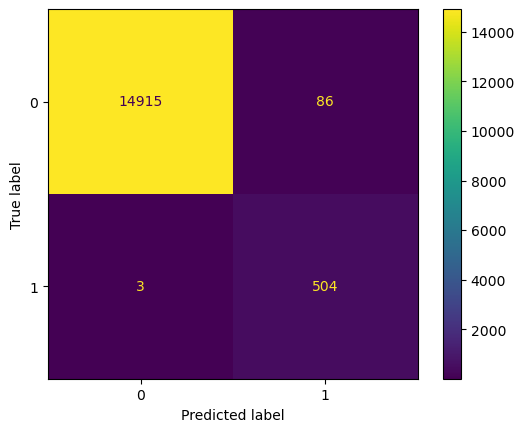

In [18]:
# Generate a confusion matrix for the model
cm_balanced = confusion_matrix(y_test, balanced_predictions)
display = ConfusionMatrixDisplay(confusion_matrix = cm_balanced)
display.plot()
plt.show()

In [19]:
# Print the classification report for the model
balanced_report = classification_report(y_test, balanced_predictions)
print(balanced_report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15001
           1       0.85      0.99      0.92       507

    accuracy                           0.99     15508
   macro avg       0.93      0.99      0.96     15508
weighted avg       1.00      0.99      0.99     15508



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** We got a balanced accuracy score of 99.41% (greater than the 95.2% we got with the unbalanced train sets). We can also see the model was able to learn very good the 0 labels (healthy loan), basically the acurracy for this label is 100%. But we still get 86% of accuracy when the model predicts about the 1 label (high-risk loan)